# Exploratory Data Analysis of Air Quality in India

This project analyzes air quality data from data.gov.in to identify pollution patterns, major pollutants, and city-wise air quality trends using Python.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading AQI csv file
df = pd.read_csv("Real time Air Quality Index from various locations.csv")

In [3]:
df

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",10-01-2026 09:00:00,24.792403,84.992416,NO2,2.0,8.0,5.0
1,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",10-01-2026 09:00:00,24.792403,84.992416,NH3,4.0,6.0,5.0
2,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",10-01-2026 09:00:00,24.792403,84.992416,SO2,12.0,16.0,14.0
3,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",10-01-2026 09:00:00,24.792403,84.992416,CO,30.0,40.0,38.0
4,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",10-01-2026 09:00:00,24.762518,84.982348,PM10,55.0,104.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...
3308,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",10-01-2026 09:00:00,22.627847,88.380669,PM2.5,91.0,320.0,266.0
3309,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",10-01-2026 09:00:00,22.627847,88.380669,OZONE,10.0,59.0,24.0
3310,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",10-01-2026 09:00:00,22.511060,88.351420,SO2,6.0,33.0,16.0
3311,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",10-01-2026 09:00:00,22.511060,88.351420,CO,24.0,111.0,46.0


In [4]:
# Displays first 5 rows of dataset
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",10-01-2026 09:00:00,24.792403,84.992416,NO2,2.0,8.0,5.0
1,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",10-01-2026 09:00:00,24.792403,84.992416,NH3,4.0,6.0,5.0
2,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",10-01-2026 09:00:00,24.792403,84.992416,SO2,12.0,16.0,14.0
3,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",10-01-2026 09:00:00,24.792403,84.992416,CO,30.0,40.0,38.0
4,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",10-01-2026 09:00:00,24.762518,84.982348,PM10,55.0,104.0,84.0


In [5]:
# Displays last 5 rows of dataset
df.tail()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
3308,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",10-01-2026 09:00:00,22.627847,88.380669,PM2.5,91.0,320.0,266.0
3309,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",10-01-2026 09:00:00,22.627847,88.380669,OZONE,10.0,59.0,24.0
3310,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",10-01-2026 09:00:00,22.511060,88.351420,SO2,6.0,33.0,16.0
3311,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",10-01-2026 09:00:00,22.511060,88.351420,CO,24.0,111.0,46.0
3312,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",10-01-2026 09:00:00,22.544808,88.340369,NO2,32.0,55.0,40.0


In [6]:
# Gives number of rows & columns in dataset
df.shape

(3313, 11)

In [7]:
# Returns total number of elements in dataset
df.size

36443

In [8]:
# Displays columns names in dataset
df.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max',
       'pollutant_avg'],
      dtype='object')

In [9]:
# Diplays data type of each column
df.dtypes

country           object
state             object
city              object
station           object
last_update       object
latitude         float64
longitude        float64
pollutant_id      object
pollutant_min    float64
pollutant_max    float64
pollutant_avg    float64
dtype: object

In [10]:
# For quick overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3313 non-null   object 
 1   state          3313 non-null   object 
 2   city           3313 non-null   object 
 3   station        3313 non-null   object 
 4   last_update    3313 non-null   object 
 5   latitude       3313 non-null   float64
 6   longitude      3313 non-null   float64
 7   pollutant_id   3313 non-null   object 
 8   pollutant_min  3125 non-null   float64
 9   pollutant_max  3125 non-null   float64
 10  pollutant_avg  3125 non-null   float64
dtypes: float64(5), object(6)
memory usage: 284.8+ KB


In [11]:
# Shows summary statistics of numerical columns
df.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3313.000000,3313.000000,3125.000000,3125.000000,3125.000000
mean,22.876198,78.608605,35.932160,96.333440,59.849920
std,5.350474,4.799172,49.957202,109.917718,75.008878
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,19.101220,75.644272,6.000000,18.000000,11.000000
50%,23.508764,77.315741,17.000000,58.000000,30.000000
75%,27.198658,80.649110,47.000000,123.000000,83.000000
max,34.066206,94.636574,385.000000,500.000000,433.000000


In [12]:
# Check any duplicate rows in dataset
df.duplicated().sum()

np.int64(0)

In [13]:
# Gives columns that contain missing values and count of missing in each column.
df.isnull().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    188
pollutant_max    188
pollutant_avg    188
dtype: int64

### Initial Observations

- The dataset contains air quality measurements across multiple Indian cities.
- Dataset contains minimum, maximum, & average pollutant values across multiple stations. 
- Some columns have missing values, which will be handled during data cleaning and no duplicated records found in dataset.

#### Fill missing values in polluntant columns using median

In [14]:
df['pollutant_min_filled'] = df['pollutant_min'].fillna(
    df['pollutant_min'].median()
)

In [15]:
df['pollutant_max_filled'] = df['pollutant_max'].fillna(
    df['pollutant_max'].median()
)

In [16]:
df['pollutant_avg_filled'] = df['pollutant_avg'].fillna(
    df['pollutant_avg'].median()
)

In [17]:
df.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max',
       'pollutant_avg', 'pollutant_min_filled', 'pollutant_max_filled',
       'pollutant_avg_filled'],
      dtype='object')

In [18]:
# Verify missing values
df.isnull().sum()

country                   0
state                     0
city                      0
station                   0
last_update               0
latitude                  0
longitude                 0
pollutant_id              0
pollutant_min           188
pollutant_max           188
pollutant_avg           188
pollutant_min_filled      0
pollutant_max_filled      0
pollutant_avg_filled      0
dtype: int64

In [19]:
# Check how many unique values are present in categorical column

df['state'].nunique()

30

In [20]:
df['city'].nunique()

258

In [21]:
df['pollutant_id'].nunique()

7

## Histogram
### 1. Distribution of Average Pollutant Levels

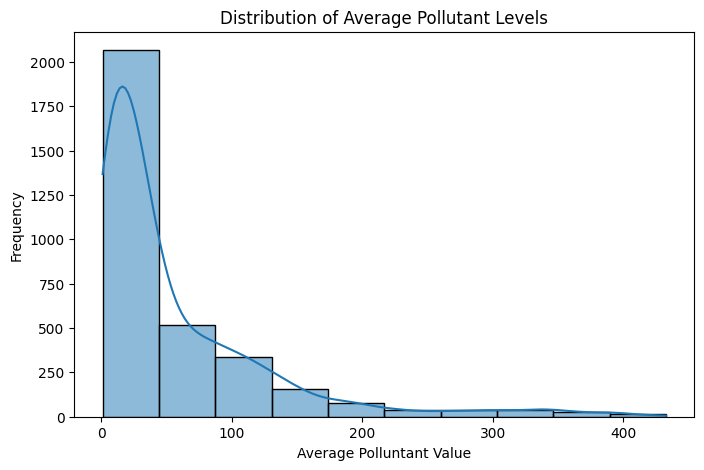

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))
sns.histplot(df['pollutant_avg_filled'], bins = 10, kde = True)
plt.title('Distribution of Average Pollutant Levels')
plt.xlabel('Average Polluntant Value')
plt.ylabel('Frequency')
plt.show()

### key insights
- The distribution of average pollutant levels is right-skewed, indicating that most observations fall in lower pollution ranges.
- A small number of locations experience very high pollution levels.
- These extreme values highlight pollution hostpots that may require immediate attention.

## Boxplot

### 2. Pollutant-wise Comparison of Average Levels

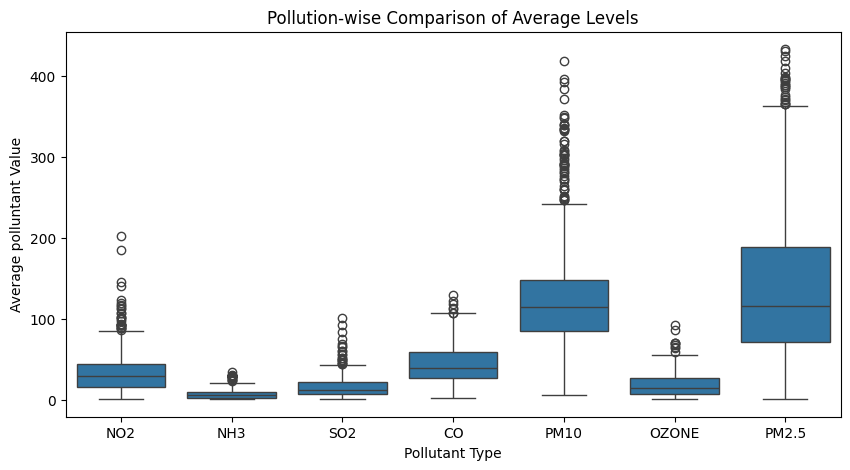

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='pollutant_id', y='pollutant_avg_filled')
plt.title('Pollution-wise Comparison of Average Levels')
plt.xlabel('Pollutant Type')
plt.ylabel('Average polluntant Value')
plt.show()

### key insights

- These pollutants also contain multiple high outliers.
- PM2.5 and PM10 shows highest median values and widest spread, making them dominant air pollutants.
- Gaseous pollutants like SO2, NH3, and Ozone remain comparatively stable with lower concentration levels.
- Overall, particulate matter contributes more significantly to poor air quality than gaseous pollutants.

In [28]:
# Column selected for outlier handling
outlier_col = 'pollutant_avg_filled'

In [29]:
def iqr_capping(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return series.clip(lower=lower_bound, upper=upper_bound)

In [30]:
df['pollutant_avg_capped'] = df.groupby('pollutant_id')[outlier_col].transform(iqr_capping)


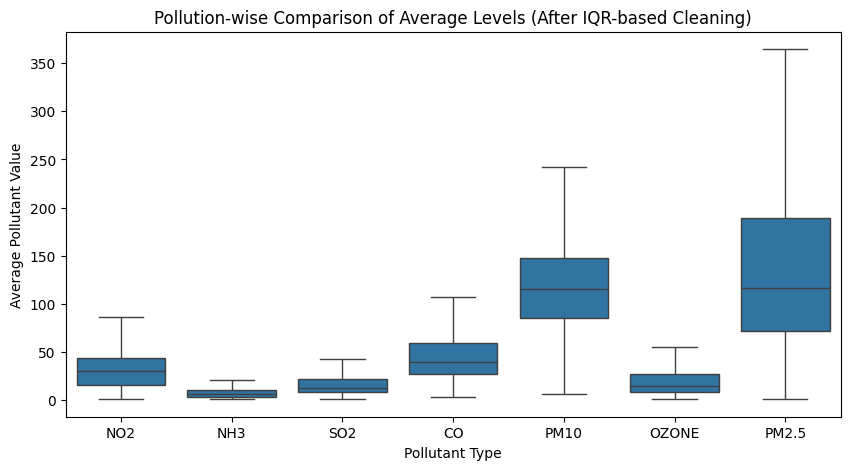

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='pollutant_id', y='pollutant_avg_capped')
plt.title('Pollution-wise Comparison of Average Levels (After IQR-based Cleaning)')
plt.xlabel('Pollutant Type')
plt.ylabel('Average Pollutant Value')
plt.show()

### IQR-based capping was applied pollutant-wise to reduce the impact of extreme values while preserving real pollution patterns.

## Bar Chart

### 3. Top 10 States by Average Pollution Level

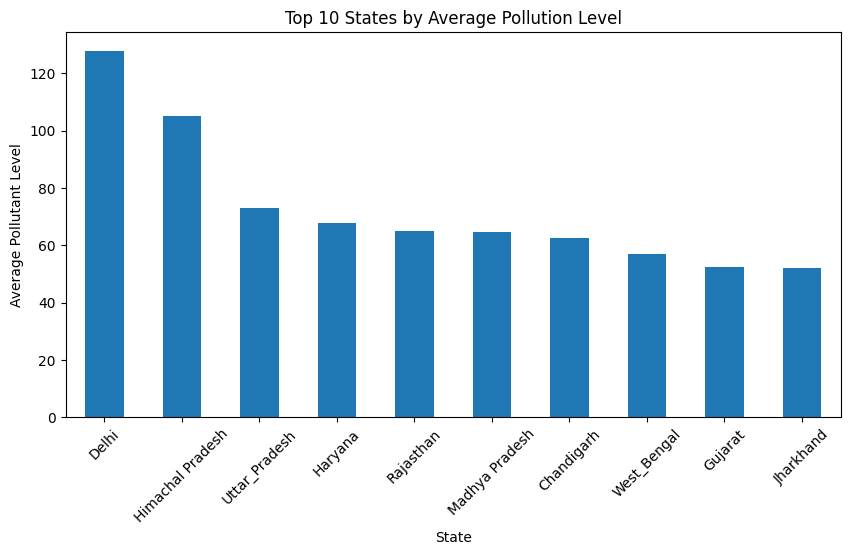

In [32]:
state_pollution = df.groupby('state')['pollutant_avg_filled'].mean().sort_values(ascending = False).head(10)

plt.figure(figsize=(10,5))
state_pollution.plot(kind= 'bar')
plt.title('Top 10 States by Average Pollution Level')
plt.xlabel('State')

plt.ylabel('Average Pollutant Level')
plt.xticks(rotation = 45)
plt.show()

### key insights
- A small number of states account for significantly higher average pollution levels.
- Pollution is unevenly distributed.
- These states can be prioritized for targeted air quality interventions and policies.

## Bar Chart

### 4. Top 10 Most Polluted Cities

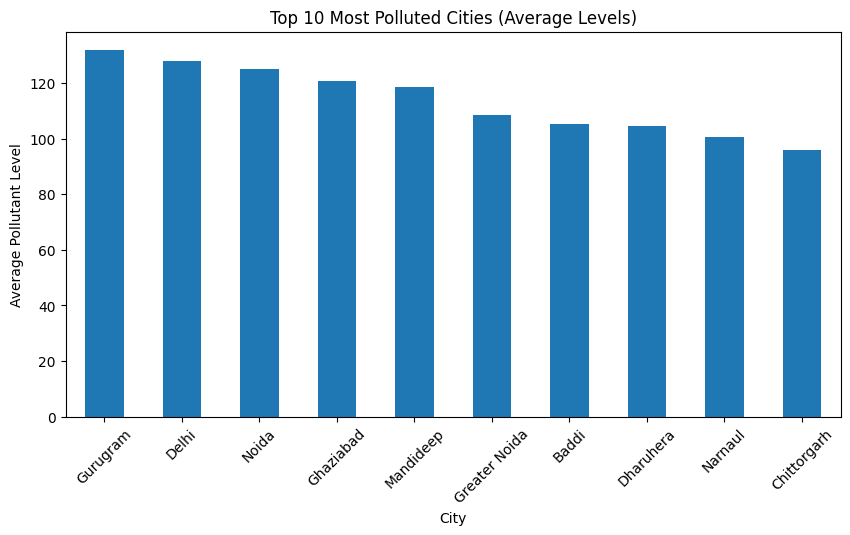

In [33]:
city_pollution = (df.groupby('city')['pollutant_avg_filled'].mean().sort_values(ascending = False).head(10))

plt.figure(figsize = (10,5))
city_pollution.plot(kind='bar')
plt.title('Top 10 Most Polluted Cities (Average Levels)')
plt.xlabel('City')
plt.ylabel('Average Pollutant Level')
plt.xticks(rotation= 45)
plt.show()

### key insights
- Urban areas dominate list of most polluted cities.
- High pollution levels in cities indicate impact of traffic congestion, industrial activity, and population density.
- City-level insights help local authorities take location-specific corrective actions.

## Pie Chart

### 5. Contribution of Different Pollutants

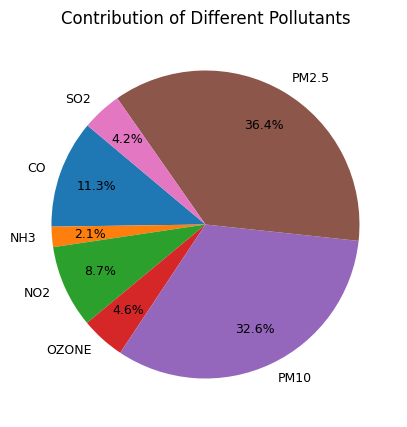

In [34]:
pollutant_share = df.groupby('pollutant_id')['pollutant_avg_filled'].mean()

plt.figure(figsize = (10,5))
pollutant_share.plot(kind= 'pie', autopct = '%1.1f%%', startangle = 140,  textprops = {'fontsize': 9}, pctdistance = 0.75)
plt.title('Contribution of Different Pollutants')
plt.ylabel('')
plt.show()

### key insights
- Particulate pollutants(PM2.5 and PM10) contribute largest share to overall pollution.
- Gaseous pollutants contribute comparatively less but still impact air quality.
- Controlling particulate emissions can result in maximum air quality improvement.

## Heatmap

### 6. Pollution Levels by State and Pollutant 

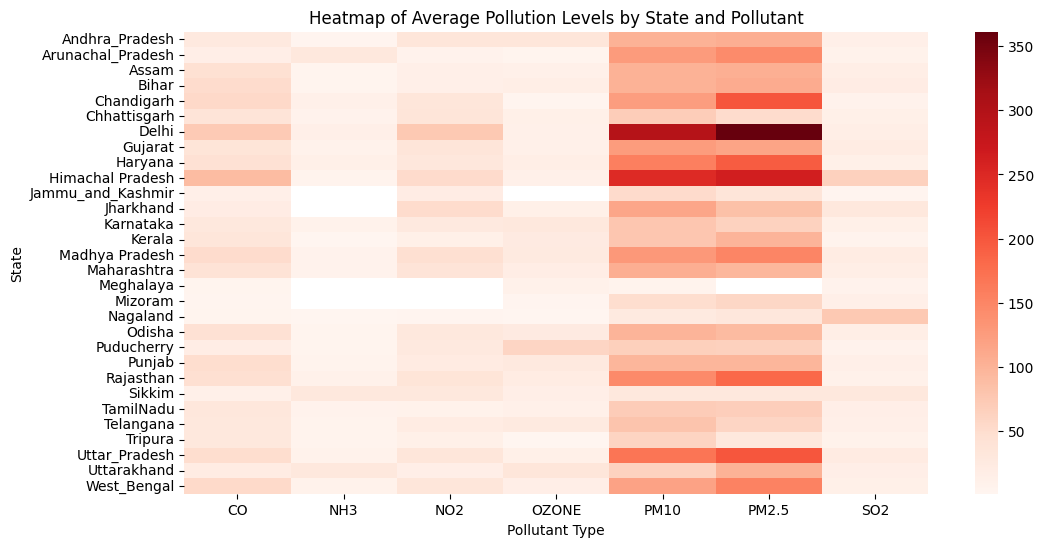

In [35]:
# Create pivot table for heatmap
heatmap_data = pd.pivot_table(
    df,
    values='pollutant_avg_filled',
    index='state',
    columns='pollutant_id',
    aggfunc='mean'
)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='Reds')
plt.title('Heatmap of Average Pollution Levels by State and Pollutant')
plt.xlabel('Pollutant Type')
plt.ylabel('State')
plt.show()

### key insights
- Pollution intensity varies across states and pollutant types.
- Certain states show consistently high pollution across multiple pollutants, marking them as high-risk regions.
- The heatmap enables quick identification of pollutant-state combinations requiiring immediate policy focus.

## Conclusion

This project demonstrates how public air quality data can be transformed into meaningful insights using python data analysis.
The findings can support policymakers and enviromental authorities in identifiying pollution hotspots and prioritizing pollutant-specific interventions.